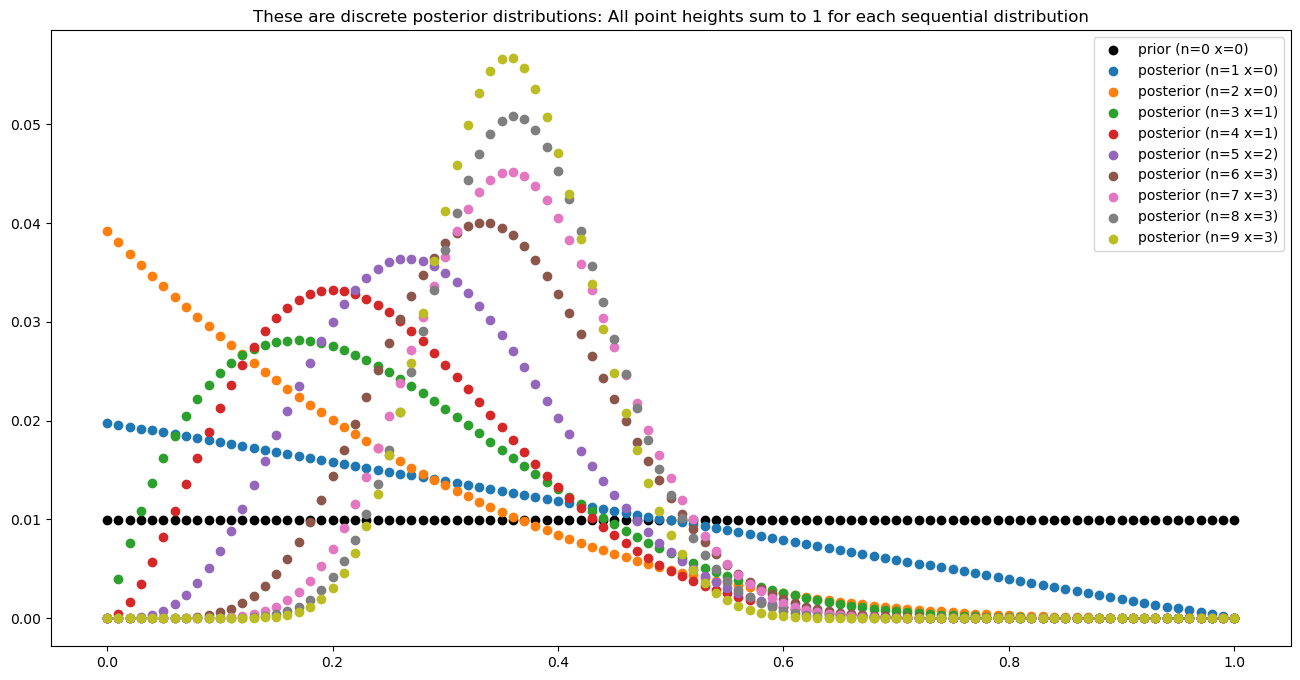

In [9]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    likelihood = stats.binom.pmf(x, n, parameter_domain)  
    posterior = likelihood * prior  
    posterior /= posterior.sum() 

    prior = posterior

    plt.scatter(parameter_domain, posterior, label="posterior (n=" + str(n) + " x=" + str(x) + ")")

plt.legend()

# The posterior distribution is a Beta distribution.
# The parameters of the Beta distribution are: alpha=x+1,beta=n−x+1

# Q2
#1 It is a Beta distribution. The parameters of the Beta distribution are:
![](hw2.png)


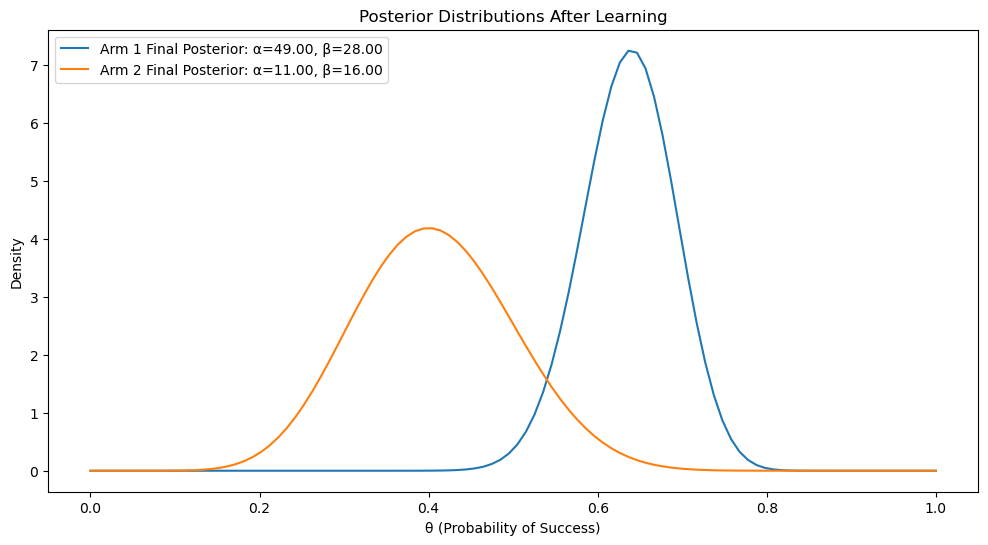

Final Posterior Parameters:
Arm 1: α = 49, β = 28
Arm 2: α = 11, β = 16

Arm Selection Over Time:
Chosen Arms: [0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [4]:
#2 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

theta_true = [0.5, 0.5]  
alpha_prior, beta_prior = 1, 1  
iterations = 100  
n_trials = [0, 0]  
x_successes = [0, 0] 

#3
posterior_evolution = {"alpha": [], "beta": [], "chosen_arm": [], "theta_sampled": []}


for t in range(iterations):
    theta_sampled = [np.random.beta(alpha_prior + x_successes[0], beta_prior + n_trials[0] - x_successes[0]),
                     np.random.beta(alpha_prior + x_successes[1], beta_prior + n_trials[1] - x_successes[1])]

    chosen_arm = np.argmax(theta_sampled)

    reward = np.random.rand() < theta_true[chosen_arm]

#4
    n_trials[chosen_arm] += 1  
    x_successes[chosen_arm] += reward  

    posterior_evolution["alpha"].append([alpha_prior + x_successes[0], alpha_prior + x_successes[1]])
    posterior_evolution["beta"].append([beta_prior + n_trials[0] - x_successes[0], beta_prior + n_trials[1] - x_successes[1]])
    posterior_evolution["chosen_arm"].append(chosen_arm)
    posterior_evolution["theta_sampled"].append(theta_sampled)

#5

x = np.linspace(0, 1, 100)
plt.figure(figsize=(12, 6))

for i, arm in enumerate(["Arm 1", "Arm 2"]):
    alpha_values = np.array(posterior_evolution["alpha"])[:, i]
    beta_values = np.array(posterior_evolution["beta"])[:, i]

    plt.plot(x, beta.pdf(x, alpha_values[-1], beta_values[-1]), label=f"{arm} Final Posterior: α={alpha_values[-1]:.2f}, β={beta_values[-1]:.2f}")

plt.title("Posterior Distributions After Learning")
plt.xlabel("θ (Probability of Success)")
plt.ylabel("Density")
plt.legend()
plt.show()

print("Final Posterior Parameters:")
for i, arm in enumerate(["Arm 1", "Arm 2"]):
    print(f"{arm}: α = {posterior_evolution['alpha'][-1][i]}, β = {posterior_evolution['beta'][-1][i]}")

print("\nArm Selection Over Time:")
print(f"Chosen Arms: {posterior_evolution['chosen_arm']}")


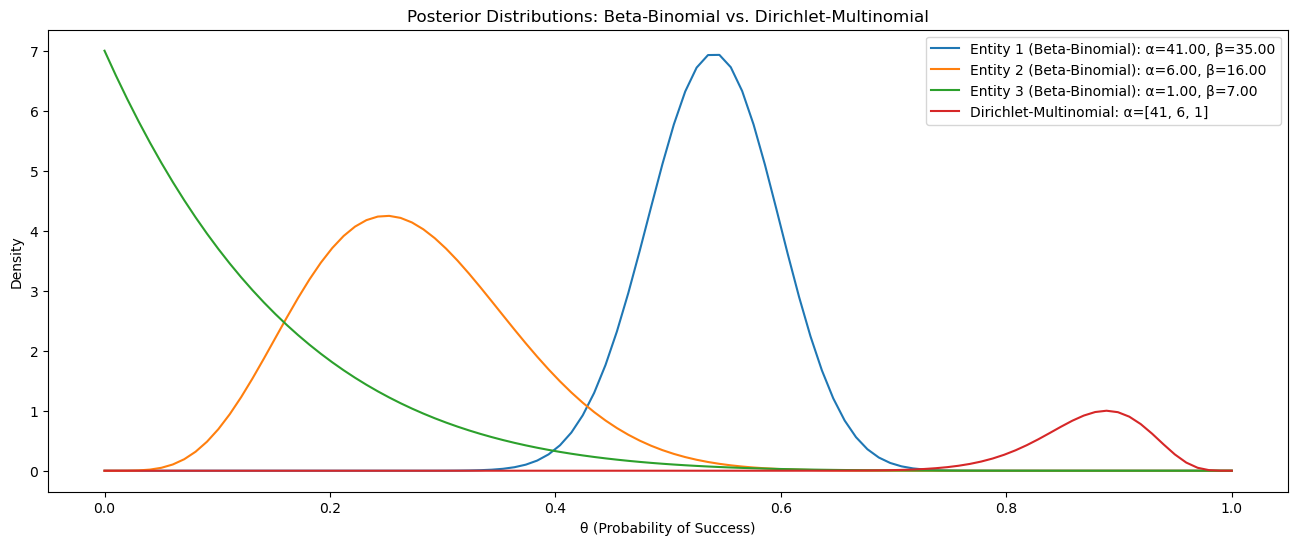

In [5]:
#Q3 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, dirichlet

theta_true = [0.5, 0.3, 0.2]  
alpha_prior, beta_prior = 1, 1  
alpha_dirichlet_prior = [1, 1, 1]  
iterations = 100  

n_trials = [0, 0, 0]  
x_successes = [0, 0, 0]  

posterior_beta_binomial = {"alpha": [], "beta": []}
posterior_dirichlet = []


for t in range(iterations):
#Analysis 1: Beta-Binomial
    theta_sampled = [np.random.beta(alpha_prior + x_successes[i], beta_prior + n_trials[i] - x_successes[i])
                     for i in range(3)]
    chosen_arm = np.argmax(theta_sampled) 
    reward = np.random.rand() < theta_true[chosen_arm]  

    n_trials[chosen_arm] += 1
    x_successes[chosen_arm] += reward

    posterior_beta_binomial["alpha"].append([alpha_prior + x_successes[i] for i in range(3)])
    posterior_beta_binomial["beta"].append([beta_prior + n_trials[i] - x_successes[i] for i in range(3)])

#Analysis 2: Dirichlet-Multinomial (Joint)
    alpha_dirichlet_posterior = [alpha_dirichlet_prior[i] + x_successes[i] for i in range(3)]
    posterior_dirichlet.append(alpha_dirichlet_posterior)


x = np.linspace(0, 1, 100)
plt.figure(figsize=(16, 6))


for i in range(3):
    plt.plot(
        x,
        beta.pdf(x, posterior_beta_binomial["alpha"][-1][i], posterior_beta_binomial["beta"][-1][i]),
        label=f"Entity {i + 1} (Beta-Binomial): α={posterior_beta_binomial['alpha'][-1][i]:.2f}, β={posterior_beta_binomial['beta'][-1][i]:.2f}"
    )


theta_points = np.linspace(0, 1, 100)
dirichlet_pdf = dirichlet.pdf(
    [theta_points, 1 - theta_points, np.zeros_like(theta_points)],
    posterior_dirichlet[-1]
)
plt.plot(
    theta_points,
    dirichlet_pdf / np.max(dirichlet_pdf),
    label=f"Dirichlet-Multinomial: α={posterior_dirichlet[-1]}"
)

plt.title("Posterior Distributions: Beta-Binomial vs. Dirichlet-Multinomial")
plt.xlabel("θ (Probability of Success)")
plt.ylabel("Density")
plt.legend()
plt.show()


As can be seen from the figure, the Beta-Binomial method models each entity separately and can intuitively reflect the respective success rate distributions. For example, the distribution of Entity 1 is concentrated at higher success rates, which is suitable for scenarios where entities are independent of each other. However, it has high data requirements, and entities with less data, such as Entity 3, converge more slowly.

On the other hand, the Dirichlet-Multinomial method captures the relationships between all entities through joint modelling, and uses data sharing to make the posterior distribution converge faster. It is suitable for scenarios where there is competition or resource sharing between entities, such as recommendation systems or traffic distribution problems. 

Let's now consider a real-world example. For example, a coffee shop may have three promotional strategies in its marketing campaign to increase the proportion of customers buying specific drinks, such as ‘buy one get one free’, ‘50% off the second drink’ and ‘buy two get one coupon’. In this scenario, the Beta-Binomial method can model the success rate of each promotional strategy independently, which is suitable for analysing situations where promotional strategies are independent of each other. In contrast, the Dirichlet-Multinomial method captures the competitive relationship between customers choosing different promotional strategies through joint modelling, and uses data sharing to accelerate the convergence of the posterior distribution. In the real world, the coffee shop's goal should be to evaluate the effectiveness of each promotional activity separately without considering the correlation between promotional strategies. 

Therefore, I think the Beta-Binomial method is better in this real world AB testing context since the strategies operate independently. 